# **AcetylChase: Bioinformatics-driven Drug Discovery for Alzheimer's Disease Targeting Acetylcholinesterase**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a curated database of bioactive molecules with drug-like properties, integrating chemical, bioactivity, and genomic data. With over 2 million compounds, it compiles information from more than 88,000 documents, 1.6 million assays, and encompasses 15,000 targets, 2,000 cells, and 45,000 indications. It serves as a valuable resource for researchers, aiding in the translation of genomic information into effective new drugs by providing comprehensive bioactivity data and facilitating the exploration of chemical structures and their biological activities.

## **Installing libraries**

In [ ]:
!pip install chembl_webresource_client
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 48.8 MB/s eta 0:00:00


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y

--2023-07-17 05:45:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   380MB/s    in 0.2s    

2023-07-17 05:45:54 (380 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Importing libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import rdkit
from chembl_webresource_client.new_client import new_client
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

## **Search for Target protein**

### **Target search for Acetylcholinesterase**
Acetylcholinesterase is an enzyme that breaks down the neurotransmitter acetylcholine, regulating its levels and terminating its signaling action in the nervous system. It plays a vital role in maintaining the proper functioning of the nervous system and is a target for drugs used in the treatment of specific conditions like Alzheimer's.

In [ ]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


Here, we will select and retrieve bioactivity data for *Human Acetylcholinesterase from the above dataframe* (first entry)**

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0
8830,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965330,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.18


## **Preprocessing data**


If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it. A standard IC50 value represents the concentration of a compound required to inhibit a specific biological activity by 50%. A value of 0 indicates that the compound did not reach the threshold required to achieve a 50% inhibition of the target activity at the tested concentration. This can happen due to various reasons, such as the compound being inactive against the target, the concentration tested being too low, or the target not being sensitive to the compound.

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2 = df2.drop(df2[df2['standard_value'] == '0.0'].index)
df2

<ipython-input-153-661fd6bbebf1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0
8830,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965330,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.18


In [ ]:
len(df2.canonical_smiles.unique())

6156

In [ ]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963372,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216438,Binding affinity to AChE (unknown origin) asse...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.209
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0


Combining the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3 = df3.reset_index(drop=True)
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [ ]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive


In [ ]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6151,CHEMBL5219841,0.209,active,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1
6152,CHEMBL5219046,274.0,active,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1
6153,CHEMBL5219594,76200.0,inactive,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
6154,CHEMBL5219958,55000.0,inactive,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1


## **Exploratory Data Analysis**


**Lipinski's Rule**:
Lipinski's Rule, also referred to as the Rule of Five, offers a widely embraced framework in drug discovery and medicinal chemistry for evaluating a compound's drug-likeness or pharmacokinetic characteristics. Developed by esteemed pharmaceutical researcher Dr. Christopher Lipinski, this rule comprises four criteria aimed at predicting the likelihood of a compound's success as an orally administered drug. The rule emphasizes properties that contribute to effective drug delivery and therapeutic efficacy, particularly in terms of absorption, distribution, metabolism, and excretion (ADME) attributes.

The four criteria of Lipinski's Rule are as follows:

1. Molecular Weight: The compound's molecular weight should not exceed 500 atomic mass units (Da). This criterion ensures that the compound's size remains conducive to efficient absorption across biological membranes.

2. Lipophilicity (LogP): The compound's partition coefficient (logP) ought to be 5 or less. LogP signifies the compound's hydrophobicity, indicating its ability to dissolve in lipids. Compounds with moderate lipophilicity demonstrate enhanced potential for crossing cell membranes and achieving effective distribution in the body.

3. Hydrogen Bond Acceptors: The compound should possess no more than 10 hydrogen bond acceptor groups, which encompass nitrogen and oxygen atoms. This criterion evaluates the compound's solubility, its propensity for forming hydrogen bonds, and its interaction potential with biological targets.

4. Hydrogen Bond Donors: The compound should contain no more than 5 hydrogen bond donor groups, which include hydroxyl and amino groups. This criterion assesses the compound's capacity to donate hydrogen bonds, which influences its solubility and interactions with biological targets.

Satisfaction of all four criteria indicates compliance with Lipinski's Rule, suggesting a higher likelihood of favorable drug-like properties. However, it's important to recognize that Lipinski's Rule serves as a guiding principle rather than an absolute determinant, and additional factors and considerations may arise during the optimization and development of drug candidates. Lipinski's Rule serves as an invaluable tool in the early stages of compound screening and drug design, aiding researchers in prioritizing compounds with greater prospects of successful oral absorption and optimal pharmacokinetic properties.

**Calculating Lipinski descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)

Combining DataFrames

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6151,390.461,2.8334,2.0,5.0
6152,352.478,5.0610,1.0,3.0
6153,287.246,2.1994,1.0,4.0
6154,311.337,3.1837,1.0,4.0


In [ ]:
df4

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive


In [ ]:
df_combined = pd.concat([df4, df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active,352.478,5.0610,1.0,3.0
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive,287.246,2.1994,1.0,4.0
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive,311.337,3.1837,1.0,4.0


***Convert IC50 to pIC50***:
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []
    k=0
    for i in input['standard_value_norm']:
        k=k+1
        molar = i*(10**-9) # Converts nM to M

        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [ ]:
df_combined['standard_value'] = df_combined['standard_value'].astype(float)

In [ ]:
df_combined.standard_value.describe()

count    6.156000e+03
mean     1.064838e+05
std      9.218820e+05
min      5.000000e-06
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [ ]:
df_final = pIC50(df_combined)


<ipython-input-170-2483b9bd4bfb>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


In [ ]:
df_final.pIC50.describe()

count    6156.000000
mean        5.824450
std         1.566736
min         1.304518
25%         4.769551
50%         5.638272
75%         6.829738
max        14.301030
Name: pIC50, dtype: float64

Removing the 'intermediate' bioactivity class**

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6150,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,active,454.057,6.19482,0.0,5.0,6.943095
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.83340,2.0,5.0,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.06100,1.0,3.0,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.19940,1.0,4.0,4.118045


In [ ]:
df_2class.to_csv('/content/drive/MyDrive/Acetylchase_project/final_df.csv', index=False)

---

### **Frequency plot of the 2 bioactivity classes**

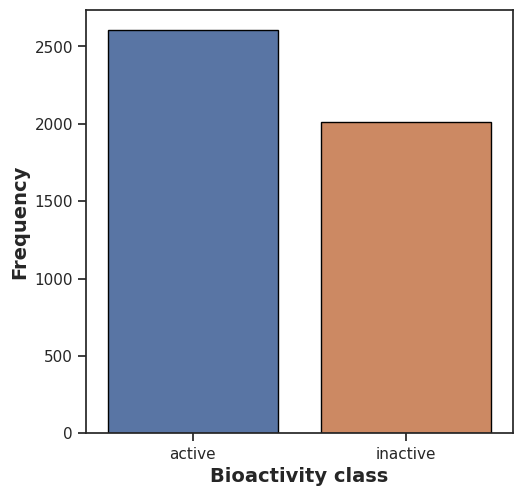

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x=df_2class['class'], data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

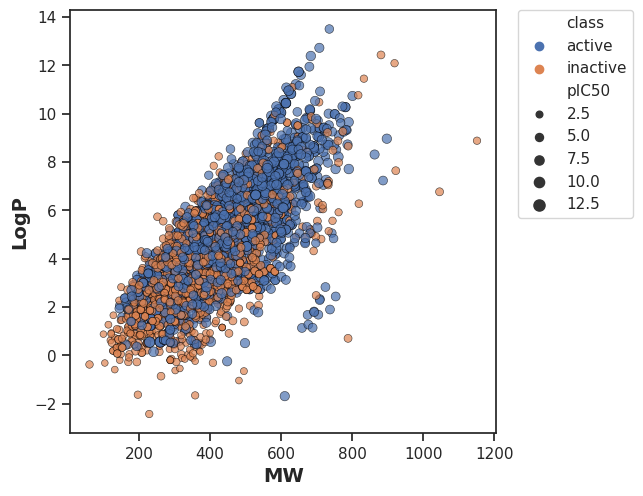

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue=df_2class['class'], size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

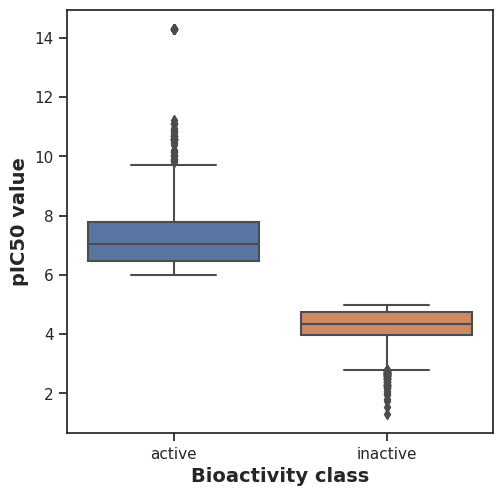

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = df_2class['class'], y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

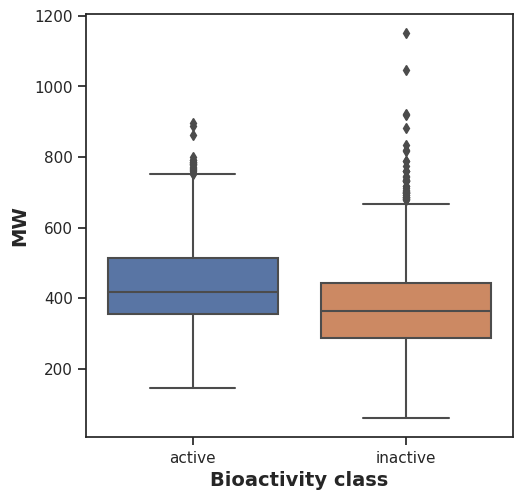

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

#### **LogP**

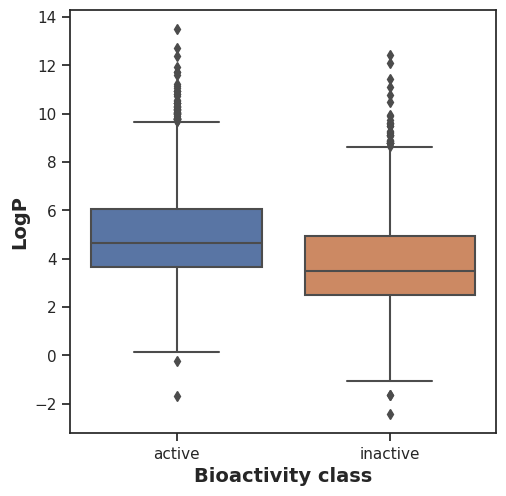

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

#### **NumHDonors**

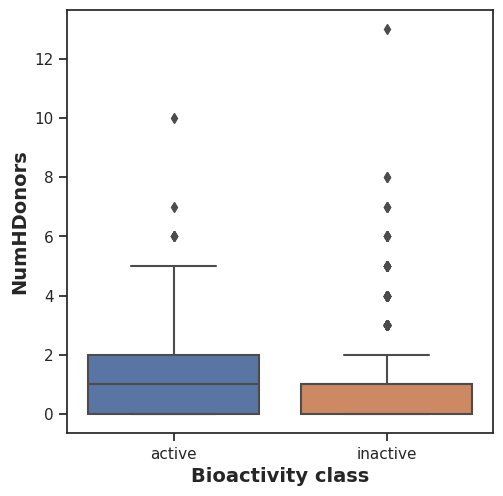

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

#### **NumHAcceptors**

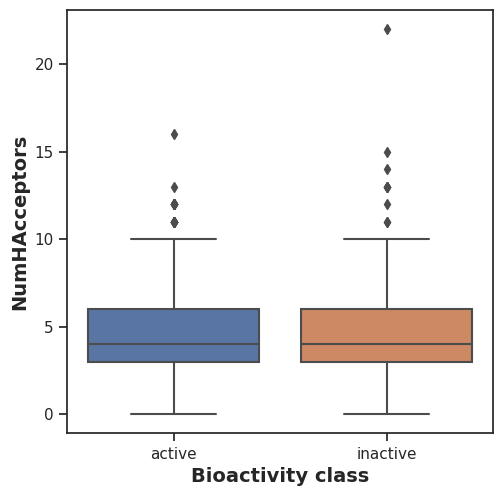

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

## **Data Preparation for Training and Testing**


Downloading Padel Descriptor

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-17 07:30:05--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-17 07:30:05--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.06s   

2023-07-17 07:30:05 (416 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-07-17 07:30:06--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Acetylchase_project/final_df.csv')

In [ ]:
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
4614,CHEMBL5219483,Cc1c(Cl)c(=O)oc2cc(OCCCCSC(=S)N3C(C)CCCC3C)ccc12,active,454.057,6.19482,0.0,5.0,6.943095
4615,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.83340,2.0,5.0,9.679854
4616,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.06100,1.0,3.0,6.562249
4617,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.19940,1.0,4.0,4.118045


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('/content/drive/MyDrive/Acetylchase_project/molecule.smi', sep='\t', index=False, header=False)

**Calculating PaDEL descriptors**

In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL336398 in molecule.smi (2/4619). 
Processing CHEMBL133897 in molecule.smi (1/4619). 
Processing CHEMBL131588 in molecule.smi (3/4619). Average speed: 6.54 s/mol.
Processing CHEMBL130628 in molecule.smi (4/4619). Average speed: 3.37 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4619). Average speed: 2.38 s/mol.
Processing CHEMBL130098 in molecule.smi (6/4619). Average speed: 1.81 s/mol.
Processing CHEMBL337486 in molecule.smi (7/4619). Average speed: 1.49 s/mol.
Processing CHEMBL336538 in molecule.smi (8/4619). Average speed: 1.27 s/mol.
Processing CHEMBL131051 in molecule.smi (9/4619). Average speed: 1.14 s/mol.
Processing CHEMBL341437 in molecule.smi (10/4619). Average speed: 1.00 s/mol.
Processing CHEMBL335033 in molecule.smi (11/4619). Average speed: 0.93 s/mol.
Processing CHEMBL122983 in molecule.smi (12/4619). Average speed: 0.86 s/mol.
Processing CHEMBL338720 in molecule.smi (13/4619). Average speed: 0.81 s/mol.
Processing CHEMBL339995 in molecule.smi (14/461

**X data**

In [ ]:
import shutil

source_file = 'descriptors_output.csv'

# Specify the destination directory
destination_directory = '/content/drive/MyDrive/Acetylchase_project/descriptors_output.csv'

# Copy the file to the destination directory
shutil.copy2(source_file, destination_directory)


In [ ]:
df3_X = pd.read_csv('/content/drive/MyDrive/Acetylchase_project/descriptors_output.csv')

In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4615,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4616,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4617,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Y data**:

In [ ]:
df3_Y = df['pIC50']
df3_Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4614    6.943095
4615    9.679854
4616    6.562249
4617    4.118045
4618    4.259637
Name: pIC50, Length: 4619, dtype: float64

In [ ]:
#Final Dataset
dataset = pd.concat([df3_X,df3_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.943095
4615,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.679854
4616,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.562249
4617,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.118045


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Acetylchase_project/acetylcholinesterase_xy.csv', index=False)

Load the data set

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Acetylchase_project/acetylcholinesterase_xy.csv')

**Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4614,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4615,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4616,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4617,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Output features**

In [ ]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4614    6.943095
4615    9.679854
4616    6.562249
4617    4.118045
4618    4.259637
Name: pIC50, Length: 4619, dtype: float64

In [ ]:
X.shape

(4619, 881)

In [ ]:
Y.shape

(4619,)

**Removing the low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(4619, 140)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((3695, 140), (3695,))

In [ ]:
X_test.shape, Y_test.shape

((924, 140), (924,))

## **Model Training and Testing**

### Random Forest Regressor

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2_rf = model.score(X_test, Y_test)
print("R^2 Score:", r2_rf)
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# Calculate the MSE
mse_rf = mean_squared_error(Y_test, Y_pred)

print("MSE:", mse_rf)

R^2 Score: 0.5715407023483765
MSE: 1.377886182456344


<function matplotlib.pyplot.show(close=None, block=None)>

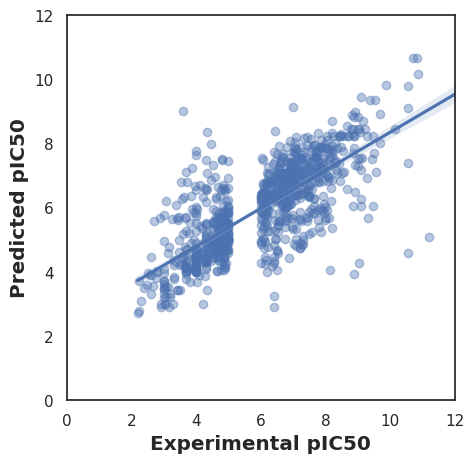

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### DecisionTreeRegressor

In [ ]:
# Create a DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the R^2 score on the test data
r2_dt = model.score(X_test, Y_test)

print("R^2 Score:", r2_dt)
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# Calculate the MSE
mse_dt = mean_squared_error(Y_test, Y_pred)

print("MSE:", mse_dt)

R^2 Score: 0.39117817203719707
MSE: 1.9579156968367422


<function matplotlib.pyplot.show(close=None, block=None)>

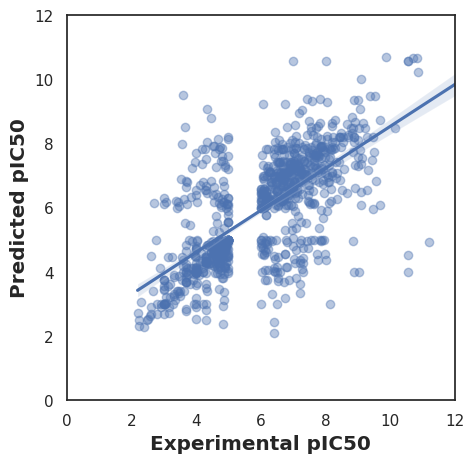

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### KNeighborsRegressor

In [ ]:
# Create a KNeighborsRegressor model
model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the R^2 score on the test data
r2_kn = model.score(X_test, Y_test)

print("R^2 Score:", r2_kn)

# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# Calculate the MSE
mse_kn = mean_squared_error(Y_test, Y_pred)

print("MSE:", mse_kn)



R^2 Score: 0.5201095371776459
MSE: 1.5432841379326199


<function matplotlib.pyplot.show(close=None, block=None)>

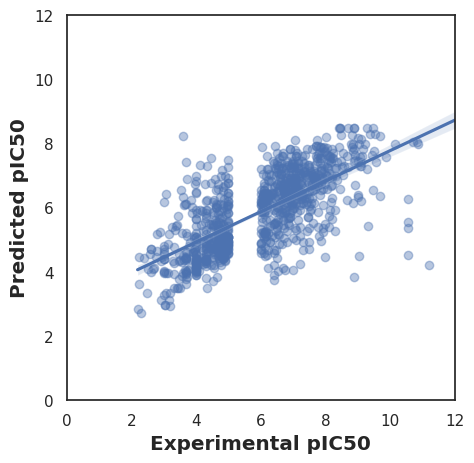

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### Bagging Regressor

In [ ]:
# Create a base model (e.g., DecisionTreeRegressor)
base_model = DecisionTreeRegressor()

# Create a BaggingRegressor model
model = BaggingRegressor(estimator=base_model, n_estimators=10)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the R^2 score on the test data
r2_bg = model.score(X_test, Y_test)

print("R^2 Score:", r2_bg)
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# Calculate the MSE
mse_bg = mean_squared_error(Y_test, Y_pred)

print("MSE:", mse_bg)

R^2 Score: 0.5221733665186707
MSE: 1.5366470502383336


<function matplotlib.pyplot.show(close=None, block=None)>

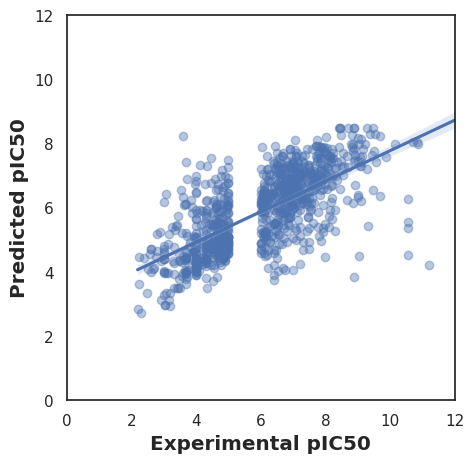

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### SVR : Support Vector Regressor


In [ ]:
# Create an SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Calculate the R^2 score on the test data
r2_sv = model.score(X_test, Y_test)

print("R^2 Score:", r2_sv)
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# Calculate the MSE
mse_sv = mean_squared_error(Y_test, Y_pred)

print("MSE:", mse_sv)

R^2 Score: 0.4854362601533615
MSE: 1.6547902473206082


<function matplotlib.pyplot.show(close=None, block=None)>

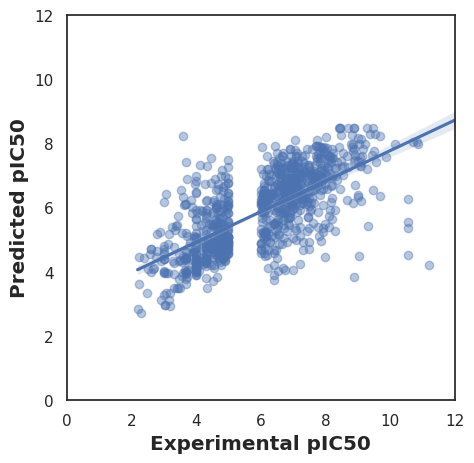

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **Inference**

In [ ]:
# Create a table object
table = PrettyTable()

# Define table columns
table.field_names = ["Regressor", "MSE", "R2 Score"]

# Add rows to the table
table.add_row(["Random Forest Regressor", round(mse_rf,4), round(r2_rf,4)])
table.add_row(["Decision Tree Regressor", round(mse_dt, 4), round(r2_dt, 4)])
table.add_row(["KNeighbors Regressor", round(mse_kn,4), round(r2_kn,4)])
table.add_row(["Bagging Regressor", round(mse_bg,4), round(r2_bg,4)])
table.add_row(["Support Vector Regressor", round(mse_sv,4), round(r2_sv,4)])

# Print the table
print(table)


+--------------------------+--------+----------+
|        Regressor         |  MSE   | R2 Score |
+--------------------------+--------+----------+
| Random Forest Regressor  | 1.3779 |  0.5715  |
| Decision Tree Regressor  | 1.9579 |  0.3912  |
|   KNeighbors Regressor   | 1.5433 |  0.5201  |
|    Bagging Regressor     | 1.5366 |  0.5222  |
| Support Vector Regressor | 1.6548 |  0.4854  |
+--------------------------+--------+----------+


Overall, the Random Forest Regressor performs comparatively better with the lowest MSE and highest R2 Score, indicating better accuracy in predicting pIC50 values for Acetylcholinesterase. The Decision Tree Regressor has the highest MSE and lowest R2 Score, suggesting relatively poorer performance in this context. The other regressors (KNeighbors, Bagging, and Support Vector) have similar performance with moderate error and prediction accuracy.